In [1]:
from PosSelect_Functions_Old import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import pandas as pd
import numpy as np
import copy
import seaborn as sns
from scipy.stats import mannwhitneyu as mwu
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import fdrcorrection
from scipy.stats import wilcoxon
from scipy.optimize import curve_fit
from scipy.stats import fisher_exact
from scipy.stats import norm
from collections import Counter
from scipy.stats import binomtest
from scipy.stats import spearmanr,pearsonr

hfont = {'fontname':'Arial'}
plt.rcParams["font.family"] = "Arial"

#Code borrowed heavily from here: https://stackoverflow.com/questions/62375034/find-non-overlapping-area-between-two-kde-plots
plt.rcParams.update(
    {"text.usetex": False}
)

def parse_table(i):
    return [int(x) for x in i.replace("[", "").replace("]", "").split(",")]

d_abrev = {"LiangSteinNeuron":"FC exc. neur.", "FetalChondrocytes":"F chond.", "SertoliMale":"FG sertoli", "preGC_IIaFemale":"FG preGC IIa",\
          "NeuralFemale":"FG neur.", "FetalGonadImmuneFemale":"FG immune", "VIP":"AC VIP inh. neur.", "LiangSteinProgenitor":"FC prog.",\
          "AdultHeartVentricularCardiomyocyte":"AH cardiomyo.", "AdultLoopOfHenle":"AK loop of henle", "FetalBrainNeurGlioblast_CB_VZ":"FCB glioblast",\
         "AdultProximalTubule":"AK prox. tub.", "FetalLeydigMale":"FG leydig", "SST":"AC SST inh neur.", "KosoyRoussosControlMicroglia":"AC microglia",\
         "FetalBrainFloorPlate":"FB fl. plate", "FetalArterialECs":"FH endoth.", "ASCT":"AC astro.", "FetalBrainCOP":"FB COP",\
         "AMY":"AA neur.", "PVALB":"AC PVALB inh neur.", "ITL23":"AC L2-3 IT neur.", "FetalBrainNeurCB_GNP_IPC_1":"FB inter. prog.", "FetalBrainNeurDAergic":"FB DA neur.",\
          "OGC":"AC Oligo.", "D1Pu":"AP D1 inh neur.", "FetalBrainNeurSerotonergic":"FB 5-HT neur.", "FetalBrainNeurDRG_2":"FS DRG neur.",\
          "FetalHeartPericytes":"FH peri.", "FetalHeartEndocardium":"FH endocard.", "FetalHeartCardiacFibroblasts":"FH fibro.", "FetalBrainNeurPurkinje_6":"FCB Purk. inh neur.",\
          "AdultHeartSmoothMuscle":"AH smooth musc.", "FetalBrainRoofPlate":"FB ro. plate"}

C:\Users\astar\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


SignificanceResult(statistic=-0.04688058841670068, pvalue=0.057833783644826796)


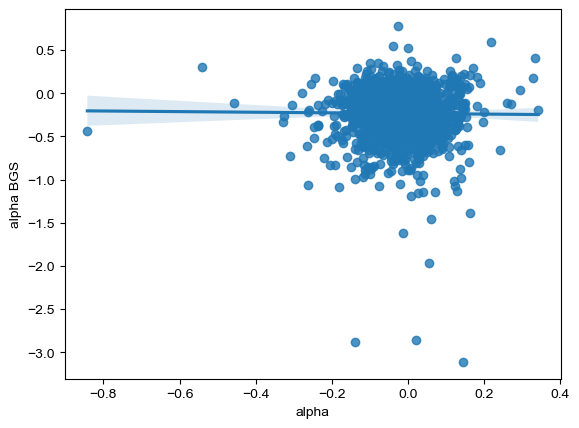

In [51]:
#Generally negative correlation with gene set
p = pd.read_csv("BGS_Stuff/Finalizing_HPO_FilterNewTEs_FisherExact_NonCod_PhyloP447_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv").set_index("Term")
p = p[p["Proportion"] == 0.8]

b = pd.read_csv("BGS_Stuff/Finalizing_HPO_FilterNewTEs_FisherExact_NonCod_BGS_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv").set_index("Term")
b = b[b["Proportion"] == 0.8]

b.columns = [x + " BGS" for x in b.columns]

v = p.join(b).dropna()

v["S PhyloP"] = np.sign(v["alpha"])*-np.log10(v["Fisher exact p-value"])
v["S BGS"] = np.sign(v["alpha BGS"])*-np.log10(v["Fisher exact p-value BGS"])

sns.regplot(data = v, x = "alpha", y = "alpha BGS")
print(spearmanr(v["alpha"], v["alpha BGS"]))

In [54]:
v.sort_values("Fisher exact p-value; alt greater").loc["Increased circulating total IgE level"]

Median Fixed PhyloP                                           0.083
Number Fixed Variants                                          4152
Median Polymorphic PhyloP                                    -0.007
Number Polymorphic Variants                                     798
Fisher exact p-value                                       0.000023
MWU p-value                                                0.000109
Fisher exact p-value; alt greater                          0.000011
MWU p-value; alt greater                                   0.000055
alpha                                                      0.327858
Cutoff                                                        0.608
[[dc1, du1], [pc1, pu1]]                 [[1125, 3027], [159, 639]]
[[dc2, du2], [pc2, pu2]]                 [[1125, 3027], [160, 638]]
Proportion                                                      0.8
Median Fixed PhyloP BGS                                       850.0
Number Fixed Variants BGS                       

SignificanceResult(statistic=-0.034552611358806086, pvalue=0.16218201059974688)


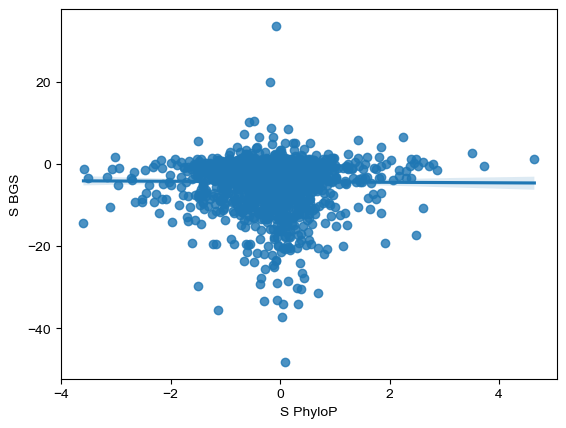

In [53]:
sns.regplot(data = v, x = "S PhyloP", y = "S BGS")
print(spearmanr(v["S PhyloP"], v["S BGS"]))

SignificanceResult(statistic=-0.05345347658885359, pvalue=8.679731134489247e-05)


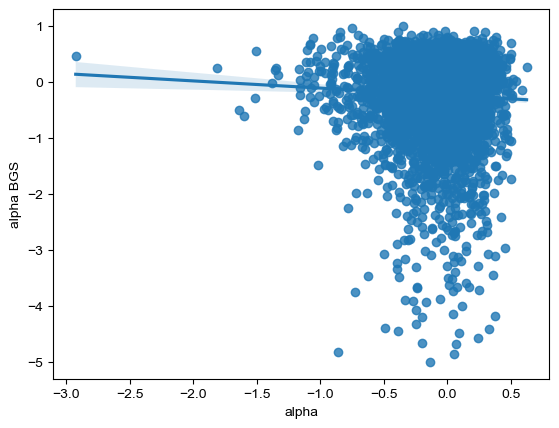

In [57]:
#Generally negative correlation with gene
p = pd.read_csv("BGS_Stuff/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_PhyloP447_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv").set_index("Gene")
p = p[p["Proportion"] == 0.6]

b = pd.read_csv("BGS_Stuff/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_BGS_MAFCut0.25_SpecSup250_PhyloPCut-100_PhastConsCut-1.csv").set_index("Gene")
b = b[b["Proportion"] == 0.6]

b.columns = [x + " BGS" for x in b.columns]

v = p.join(b).dropna()

v = v[v["alpha"] > -5]
v = v[v["alpha BGS"] > -5]

v["S PhyloP"] = np.sign(v["alpha"])*-np.log10(v["Fisher exact p-value"])
v["S BGS"] = np.sign(v["alpha BGS"])*-np.log10(v["Fisher exact p-value BGS"])

sns.regplot(data = v, x = "alpha", y = "alpha BGS")
print(spearmanr(v["alpha"], v["alpha BGS"]))

SignificanceResult(statistic=-0.04096949607405014, pvalue=0.0026358791622148503)


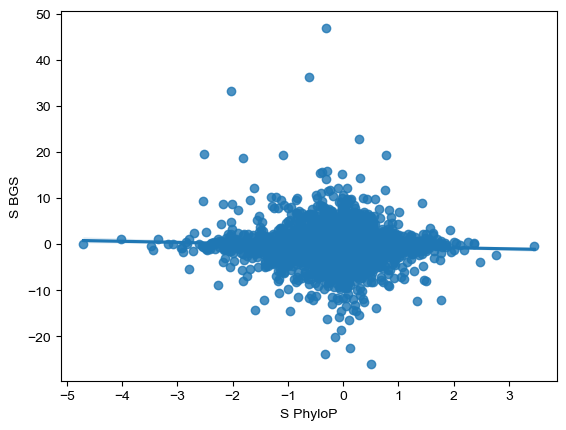

In [20]:
sns.regplot(data = v, x = "S PhyloP", y = "S BGS")
print(spearmanr(v["S PhyloP"], v["S BGS"]))

In [75]:
v.sort_values("MWU p-value BGS").head(50)

,Median Fixed PhyloP,Number Fixed Variants,Median Polymorphic PhyloP,Number Polymorphic Variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,...,MWU p-value BGS,Fisher exact p-value; alt greater BGS,MWU p-value; alt greater BGS,alpha BGS,Cutoff BGS,"[[dc1, du1], [pc1, pu1]] BGS","[[dc2, du2], [pc2, pu2]] BGS",Proportion BGS,S PhyloP,S BGS
Gene,,,,,,,,,,,,,,,,,,,,,
TYW1,0.019989,4324,0.020205,2219,0.915181,0.721276,0.463367,0.360638,0.006331,0.026485,...,1.910764e-104,6.430000e-60,9.553819e-105,0.577365,823.0,"[[2646, 1678], [887, 1332]]","[[2654, 1670], [892, 1327]]",0.6,0.038493,58.973222
SI,0.018837,8216,0.019353,2422,0.200463,0.113040,0.905256,0.943481,-0.062833,0.025475,...,5.791255e-74,5.707351e-47,2.895627e-74,0.545470,794.0,"[[4851, 3365], [880, 1542]]","[[5130, 3086], [1115, 1307]]",0.6,-0.697966,46.057075
MIR205HG,0.020967,2874,0.021078,604,1.000000,0.506973,0.519780,0.253486,-0.000185,0.027251,...,1.545421e-61,1.000000e+00,1.000000e+00,-2.823248,871.0,"[[422, 2452], [240, 364]]","[[431, 2443], [243, 361]]",0.6,0.000000,-39.396491
POM121L12,0.020277,7630,0.019761,2217,0.863113,0.914860,0.580302,0.542573,-0.008767,0.027292,...,2.459271e-61,1.000000e+00,1.000000e+00,-0.886953,934.0,"[[1905, 5725], [860, 1357]]","[[2037, 5593], [898, 1319]]",0.6,-0.063933,-34.137284
MGAT4C,0.018823,3912,0.017685,548,0.676817,0.317298,0.345813,0.158649,0.040565,0.024487,...,4.494560e-53,1.000000e+00,1.000000e+00,-1.834170,749.0,"[[784, 3128], [217, 331]]","[[858, 3054], [253, 295]]",0.6,0.169529,-21.745064
AKT3,0.019096,239,0.019138,202,0.807120,0.826964,0.651321,0.413482,-0.058687,0.026236,...,4.073025e-51,1.374633e-52,2.036512e-51,1.000000,620.0,"[[239, 0], [76, 126]]","[[239, 0], [84, 118]]",0.6,-0.093062,51.861813
PABPC4L,0.019388,8673,0.019404,2220,0.951596,0.897559,0.538619,0.448779,-0.003490,0.025568,...,2.074355e-50,1.000000e+00,1.000000e+00,-1.064646,880.0,"[[2085, 6588], [882, 1338]]","[[2201, 6472], [911, 1309]]",0.6,-0.021547,-45.354847
BICC1,0.021527,1317,0.020635,416,0.796852,0.115835,0.405207,0.057917,0.033719,0.027874,...,7.808100e-49,3.585415e-62,3.904050e-49,0.866919,771.0,"[[1094, 223], [165, 251]]","[[1102, 215], [168, 248]]",0.6,0.098622,61.294838
DPYD,0.018801,3919,0.020582,530,0.569234,0.328123,0.737590,0.835947,-0.057129,0.025996,...,2.004634e-48,1.000000e+00,1.000000e+00,-1.631474,829.0,"[[686, 3233], [171, 359]]","[[789, 3130], [229, 301]]",0.6,-0.244709,-13.854668


SignificanceResult(statistic=0.015601054474632605, pvalue=0.14616614196381195)


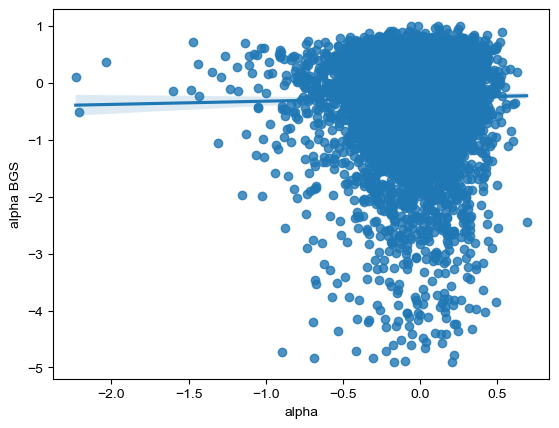

In [71]:
#Generally negative correlation with gene
p = pd.read_csv("BGS_Stuff/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_DlLiangSteinNeuron_abs_logfc_All_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv").set_index("Gene")
p = p[p["Proportion"] == 0.6]

b = pd.read_csv("BGS_Stuff/Finalizing_PerGene_FilterNewTEs_FisherExact_NonCod_BGS_MAFCut0.25_SpecSup0_PhyloPCut-100_PhastConsCut-1.csv").set_index("Gene")
b = b[b["Proportion"] == 0.6]

b.columns = [x + " BGS" for x in b.columns]

v = p.join(b).dropna()

v = v[v["alpha"] > -5]
v = v[v["alpha BGS"] > -5]

v["S PhyloP"] = np.sign(v["alpha"])*-np.log10(v["Fisher exact p-value"])
v["S BGS"] = np.sign(v["alpha BGS"])*-np.log10(v["Fisher exact p-value BGS"])

sns.regplot(data = v, x = "alpha", y = "alpha BGS")
print(spearmanr(v["alpha"], v["alpha BGS"]))

SignificanceResult(statistic=0.018955101348614598, pvalue=0.07744928604018322)


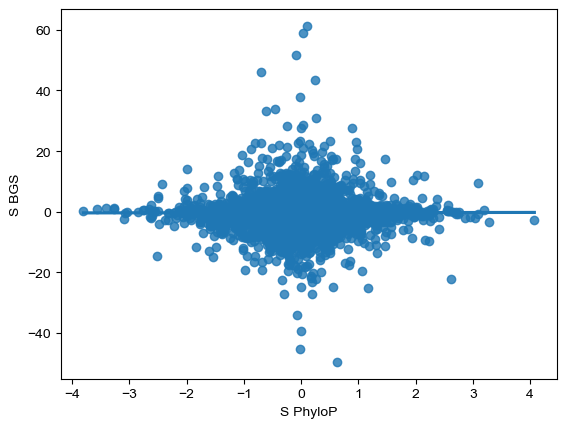

In [22]:
sns.regplot(data = v, x = "S PhyloP", y = "S BGS")
print(spearmanr(v["S PhyloP"], v["S BGS"]))

In [23]:
#Need to read in the BGS stuff and see if PhyloP is generally correlated with BGS
#Also need to see if fixed sites tend to be in regions of higher or lower BGS than polymorphic sites

v, yvalls = read_noncoding_data_fast(path = "./", maf_cut = 0.25, spec_sup = 0)
yvalls = add_unfold(yvalls)
v.index = v["Position"]
yvalls.index = yvalls["Position"]
bgs_v = pd.read_csv("HumChp_NC_Final_Rmdup_CREs_NoHLA_Intersect_BGS.txt", sep = "\t", header = None).set_index(0)
bgs_v.columns = ["BGS"]
v = v.join(bgs_v).dropna()
v = v[~v["BGS"].isin(["."])]
v["BGS"] = v["BGS"].astype(float)

bgs_vv = pd.read_csv("HumPoly_NC_Final_CREs_NoHLA_Intersect_BGS.txt", sep = "\t", header = None).set_index(0)
bgs_vv.columns = ["BGS"]
yvalls = yvalls.join(bgs_vv).dropna()
yvalls = yvalls[~yvalls["BGS"].isin(["."])]
yvalls["BGS"] = yvalls["BGS"].astype(float)

v = v.drop_duplicates("Position")
yvalls = yvalls.drop_duplicates("Position")

10549162 6483874
10326920 6229149
10030151 5801859
(10030151, 6)
(10030151, 6)
(10030151, 6)


C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:583: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_alt["UnfoldedMAF"] = 1-yvalls_alt["MAFMaxAcrossAncestry"]
C:\Users\astar\PosSelect_ForPub\PosSelect_Functions_Old.py:584: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yvalls_ref["UnfoldedMAF"] = yvalls_ref["MAFMaxAcrossAncestry"]
C:\Users\astar\AppData\Local\Temp\ipykernel_23872\2982511087.py:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=Fals

In [24]:
v

,Position,NearestGene,NearestDist,PhyloP447,PhastCons447,SpecSup447,BGS
Position,,,,,,,
chr1:1384767,chr1:1384767,AURKAIP1,9416,0.483,0.036,98,653.0
chr1:1385179,chr1:1385179,AURKAIP1,9828,0.470,0.001,95,653.0
chr1:1385181,chr1:1385181,AURKAIP1,9830,0.472,0.001,95,653.0
chr1:1385191,chr1:1385191,AURKAIP1,9840,-0.745,0.000,95,653.0
chr1:1385695,chr1:1385695,AURKAIP1,10344,0.601,0.022,91,653.0
...,...,...,...,...,...,...,...
chr9:137171565,chr9:137171565,TMEM210,0,1.765,0.001,286,537.0
chr9:137171591,chr9:137171591,TMEM210,0,-2.731,0.000,369,537.0
chr9:137171802,chr9:137171802,TMEM210,0,-6.749,0.000,238,537.0


In [42]:
v = v[v["SpecSup447"] > 250]
yvalls = yvalls[yvalls["SpecSup447"] > 250]
from scipy.stats import pearsonr
print(pearsonr(v["PhastCons447"], v["BGS"]))
print(pearsonr(yvalls["PhastCons447"], yvalls["BGS"]))

print(pearsonr(v["PhyloP447"], v["BGS"]))
print(pearsonr(yvalls["PhyloP447"], yvalls["BGS"]))

PearsonRResult(statistic=-0.07215834994856056, pvalue=0.0)
PearsonRResult(statistic=-0.07001498478134578, pvalue=0.0)
PearsonRResult(statistic=-0.09520295548825082, pvalue=0.0)
PearsonRResult(statistic=-0.08897480041919623, pvalue=0.0)


In [43]:
print(spearmanr(v["PhyloP447"], v["BGS"]))
print(spearmanr(yvalls["PhyloP447"], yvalls["BGS"]))

print(spearmanr(v["PhastCons447"], v["BGS"]))
print(spearmanr(yvalls["PhastCons447"], yvalls["BGS"]))

SignificanceResult(statistic=-0.10706220563316092, pvalue=0.0)
SignificanceResult(statistic=-0.09990651728580952, pvalue=0.0)
SignificanceResult(statistic=-0.09617822829892002, pvalue=0.0)
SignificanceResult(statistic=-0.09039975817058375, pvalue=0.0)


In [45]:
v2 = v[v["PhyloP447"] > 1]
yvalls2 = yvalls[yvalls["PhyloP447"] > 1]

print(pearsonr(v2["PhyloP447"], v2["BGS"]))
print(spearmanr(v2["PhyloP447"], v2["BGS"]))

print(pearsonr(yvalls2["PhyloP447"], yvalls2["BGS"]))
print(spearmanr(yvalls2["PhyloP447"], yvalls2["BGS"]))

print(pearsonr(v2["PhastCons447"], v2["BGS"]))
print(spearmanr(v2["PhastCons447"], v2["BGS"]))

print(pearsonr(yvalls2["PhastCons447"], yvalls2["BGS"]))
print(spearmanr(yvalls2["PhastCons447"], yvalls2["BGS"]))

PearsonRResult(statistic=-0.04050451240916436, pvalue=3.9758771664468676e-260)
SignificanceResult(statistic=-0.03636474682350944, pvalue=4.747539841318751e-210)
PearsonRResult(statistic=-0.04173982942786689, pvalue=1.4538729171873057e-76)
SignificanceResult(statistic=-0.03528982074947938, pvalue=3.0593281626322436e-55)
PearsonRResult(statistic=-0.08401764981771352, pvalue=0.0)
SignificanceResult(statistic=-0.09989752766162291, pvalue=0.0)
PearsonRResult(statistic=-0.08575569123489796, pvalue=1.2224854e-317)
SignificanceResult(statistic=-0.10015966208995251, pvalue=0.0)


<Axes: xlabel='PhyloP447', ylabel='BGS'>

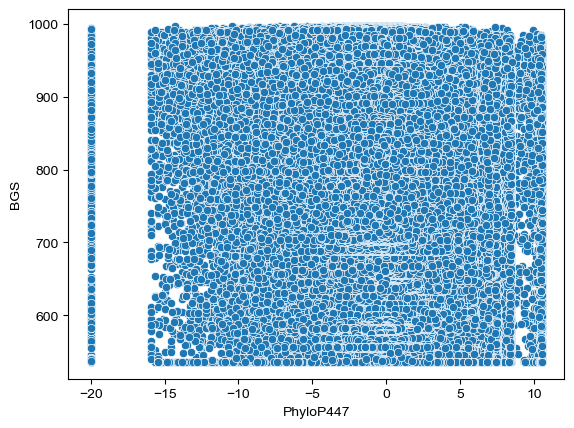

In [38]:
sns.scatterplot(data = v, x = "PhyloP447", y = "BGS")

In [82]:
vv

,Window,Statistic,Median fixed PhyloP447,Number fixed variants,Median polymorphic PhyloP447,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
1,chr1:900000-950000,PhyloP447,-0.0330,98,-0.1225,28,0.460388,0.419746,0.271110,0.209873,0.301471,-0.028,"[[49, 49], [11, 17]]","[[49, 49], [12, 16]]",0.6
6,chr1:1125000-1175000,PhyloP447,-0.3590,69,-1.1670,20,0.044795,0.091843,0.027744,0.045922,0.678632,-0.974,"[[45, 24], [7, 13]]","[[45, 24], [8, 12]]",0.6
11,chr1:1150000-1200000,PhyloP447,-0.3150,75,-0.9425,22,0.638340,0.291293,0.340698,0.145646,0.277865,-0.228,"[[35, 40], [8, 14]]","[[35, 40], [9, 13]]",0.6
16,chr1:2050000-2100000,PhyloP447,-0.7870,95,-0.5975,26,0.657613,0.495534,0.774798,0.754225,-0.276010,-0.465,"[[33, 62], [10, 16]]","[[33, 62], [11, 15]]",0.6
21,chr1:2200000-2250000,PhyloP447,-0.6900,87,-0.5550,22,0.905236,0.814955,0.621743,0.407478,-0.033966,-0.274,"[[33, 54], [8, 14]]","[[33, 54], [9, 13]]",0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308326,chrX:152900000-152950000,PhyloP447,-0.0350,75,-0.0410,21,0.901770,0.780111,0.487130,0.613341,0.131119,0.058,"[[33, 42], [8, 13]]","[[33, 42], [9, 12]]",0.6
308331,chrX:153200000-153250000,PhyloP447,0.3070,73,0.7270,22,0.621631,0.285745,0.807203,0.859109,-0.373626,1.091,"[[23, 50], [8, 14]]","[[23, 50], [9, 13]]",0.6
308336,chrX:153475000-153525000,PhyloP447,0.0600,119,-0.6240,24,0.002741,0.006118,0.002301,0.003059,0.758292,-0.510,"[[87, 32], [9, 15]]","[[87, 32], [10, 14]]",0.6
308341,chrX:153600000-153650000,PhyloP447,0.0500,56,0.1240,23,0.811511,0.774894,0.714024,0.387447,-0.176740,0.196,"[[21, 35], [9, 14]]","[[21, 35], [10, 13]]",0.6


In [86]:
v = pd.read_csv("BGS_Stuff/Windows_FilterNewTEs_500KB_NoBGS_PC-1_SpecSup250_PhyloP447_MAF0.25.txt", sep = "\t")
vv = pd.read_csv("BGS_Stuff/Windows_FilterNewTEs_50KB_NoBGS_PC-1_SpecSup250_PhyloP447_MAF0.25.txt", sep = "\t")

v = v[v["Proportion"] == 0.6]
vv = vv[vv["Proportion"] == 0.6]
vv.sort_values(" MWU p-value; alt greater")

,Window,Statistic,Median fixed PhyloP447,Number fixed variants,Median polymorphic PhyloP447,Number polymorphic variants,Fisher exact p-value,MWU p-value,Fisher exact p-value; alt greater,MWU p-value; alt greater,alpha,Cutoff,"[[dc1, du1], [pc1, pu1]]","[[dc2, du2], [pc2, pu2]]",Proportion
167011,chr8:103325000-103375000,PhyloP447,0.1510,89,-0.7180,24,0.000267,0.000045,0.000192,0.000022,0.844841,-0.259,"[[72, 17], [9, 15]]","[[72, 17], [10, 14]]",0.6
95601,chr4:184050000-184100000,PhyloP447,0.0540,175,-0.5790,50,0.000028,0.000159,0.000019,0.000080,0.758192,-0.451,"[[127, 48], [19, 31]]","[[127, 48], [20, 30]]",0.6
238181,chr13:84425000-84475000,PhyloP447,-0.0180,81,-0.5020,39,0.001526,0.000240,0.000918,0.000120,0.738147,-0.244,"[[58, 23], [15, 24]]","[[58, 23], [16, 23]]",0.6
238436,chr13:86250000-86300000,PhyloP447,0.3860,75,-0.3270,37,0.000241,0.000329,0.000192,0.000165,0.796235,-0.113,"[[57, 18], [14, 23]]","[[57, 18], [15, 22]]",0.6
24616,chr2:7275000-7325000,PhyloP447,-0.2435,114,-1.4710,24,0.024695,0.000410,0.017529,0.000205,0.658286,-0.756,"[[75, 39], [9, 15]]","[[75, 39], [10, 14]]",0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197781,chr10:106375000-106425000,PhyloP447,-0.1645,132,0.2170,30,0.030426,0.000117,0.993790,0.999943,-1.802632,0.428,"[[24, 108], [11, 19]]","[[24, 108], [12, 18]]",0.6
257411,chr15:76250000-76300000,PhyloP447,0.2070,94,1.2385,42,0.000020,0.000103,0.999998,0.999950,-7.049890,2.591,"[[7, 87], [16, 26]]","[[7, 87], [17, 25]]",0.6
107711,chr5:102075000-102125000,PhyloP447,-0.1910,61,0.3180,33,0.021535,0.000088,0.995288,0.999957,-2.151914,0.374,"[[11, 50], [13, 20]]","[[11, 50], [14, 19]]",0.6
106181,chr5:86400000-86450000,PhyloP447,-0.2395,166,0.3515,30,0.007751,0.000085,0.998184,0.999958,-2.353576,0.575,"[[26, 140], [11, 19]]","[[26, 140], [12, 18]]",0.6


In [85]:
vv.columns

Index(['Window', 'Statistic', 'Median fixed PhyloP447',
       'Number fixed variants', 'Median polymorphic PhyloP447',
       'Number polymorphic variants', 'Fisher exact p-value', 'MWU p-value',
       'Fisher exact p-value; alt greater', ' MWU p-value; alt greater',
       'alpha', 'Cutoff', '[[dc1, du1], [pc1, pu1]]',
       '[[dc2, du2], [pc2, pu2]]', 'Proportion'],
      dtype='object')